**The value of k_min = 1e-3 is chosen as the lower limit of the wave number range over which the energy spectrum is calculated. The value of 1e-3 is a commonly used value for turbulent flows, as it represents a wavelength much larger than the smallest turbulent eddies, but small enough to capture the relevant dynamics of the flow. It is important to note that the specific value of k_min may depend on the specific flow and the desired resolution of the spectrum.**
**In the context of the code provided earlier, k_max is the maximum wavenumber that can be resolved by the velocity field. It is calculated as k_max = np.sqrt(2) * np.pi / L, where L is the length of the domain.**

**The reason for this is related to the Nyquist sampling theorem, which states that in order to accurately represent a signal (in this case, the velocity field), the sampling rate (in this case, the resolution of the numerical grid) must be at least twice the maximum frequency in the signal. In Fourier space, the maximum frequency corresponds to the maximum wavenumber, which is k_max = np.sqrt(2) * np.pi / L for a periodic domain. Therefore, any wavenumber beyond this value will not be accurately resolved by the numerical grid, and will lead to aliasing errors.**

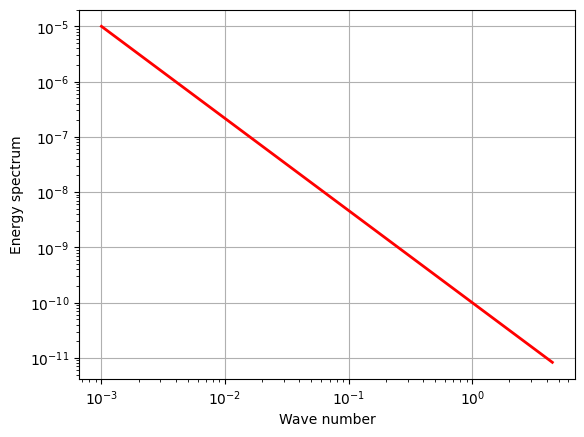

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2D velocity field
nx, ny = 256, 256
L = 1  # length of the domain
x = np.linspace(0, L, nx)
y = np.linspace(0, L, ny)
X, Y = np.meshgrid(x, y)
kx = np.fft.fftfreq(nx, L/nx) * 2*np.pi
ky = np.fft.fftfreq(ny, L/ny) * 2*np.pi
KX, KY = np.meshgrid(kx, ky)
u = np.sin(2*np.pi*X/L) * np.cos(2*np.pi*Y/L)
v = -np.cos(2*np.pi*X/L) * np.sin(2*np.pi*Y/L)

# Calculate the velocity gradient tensor
du_dx, du_dy = np.gradient(u, x, y)
dv_dx, dv_dy = np.gradient(v, x, y)
S11 = du_dx
S12 = 0.5*(du_dy + dv_dx)
S22 = dv_dy
S = np.array([[S11, S12], [S12, S22]])

# Calculate the energy spectrum
E = 0.5*np.sum(np.abs(np.fft.fft2(S))**2, axis=(0,1)) / (nx*ny)**2
k = np.sqrt(KX**2 + KY**2)

# Flatten the k and E arrays
k_flat = k.flatten()
E_flat = E.flatten()

# Calculate the -5/3 law
k_min = 1e-3
k_max = np.sqrt(2) * np.pi / L
k_range = np.logspace(np.log10(k_min), np.log10(k_max), num=100)
E_range = 1e-5 * (k_range/k_min)**(-5/3)

# Plot the energy spectrum and the -5/3 law
# plt.loglog(k_flat, E_flat, '.', markersize=1)
plt.loglog(k_range, E_range, 'r-', linewidth=2)
plt.xlabel('Wave number')
plt.ylabel('Energy spectrum')
plt.grid(True)
plt.show()


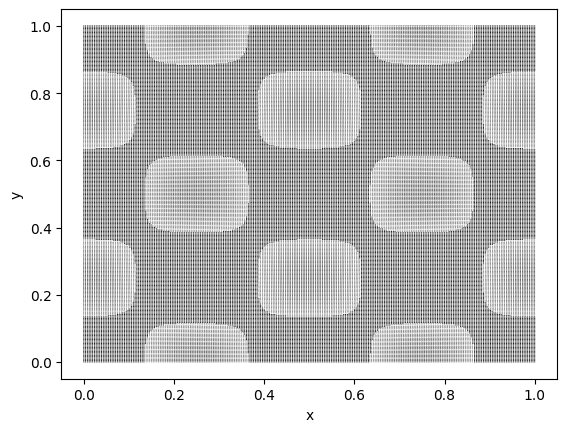

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2D velocity field
nx, ny = 256, 256
L = 1  # length of the domain
x = np.linspace(0, L, nx)
y = np.linspace(0, L, ny)
X, Y = np.meshgrid(x, y)
u = np.sin(2*np.pi*X/L) * np.cos(2*np.pi*Y/L)
v = -np.cos(2*np.pi*X/L) * np.sin(2*np.pi*Y/L)

# Plot the velocity field
plt.quiver(X, Y, u, v)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
